# Calibration
This file analyzes the single harmonic 440Hz sine tone to calibrate the microphone

In [6]:
import numpy as np
import scipy.signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

Sampling rate: 44100 


Text(0, 0.5, 'Amplitude')

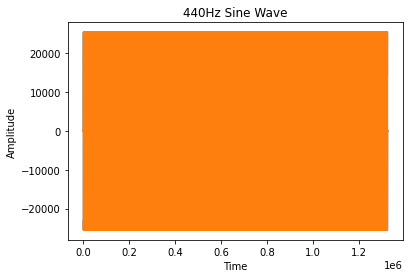

In [7]:
# Getting the 440Hz Sine Tone
fs, tone = wavfile.read('../data/calibration_tones/A440.wav')

# Finding the sampling rate
print(f'Sampling rate: {fs} ')

end = 10000
tone_shortened = tone[:end]

# Plotting the tone
time_shortened = np.arange(1, tone_shortened.shape[0] + 1)

# Plotting the graph
plt.plot(time_shortened, tone_shortened)
plt.title('440Hz Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
